In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
from scipy.optimize import fsolve
import numpy as np
import cmath
from scipy.optimize import curve_fit

/Users/kunwoosmac/opt/anaconda3/envs/tensorflow/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Q1

- Characteristic Equation : 
- det(A - x*I)
- (1-x)*(4-x) - 4
- Solve

In [2]:
def oneEquation(x): 
    return (1-x)*(4-x) - 4

guess1 = -10
z = fsolve(oneEquation, guess1)
print("Eigenvalue 1 :", z[0].round(10))

guess2 = 10
z = fsolve(oneEquation, guess2)
print("Eigenvalue 2:", z[0].round(10))

Eigenvalue 1 : 0.0
Eigenvalue 2: 5.0


# Q2
- Find the principal stresses

In [3]:
Stress = np.array([[4,10,-1],[10,28,12],[-1,12,8]])
eigval, eigvec = np.linalg.eig(Stress)
print("principal stresses at the point :", eigval)

principal stresses at the point : [36.00707038 -2.97943406  6.97236368]


- Find only the unit vector which is perpendicular/normal to the plane on which the principal stress with the minimum magnitude is acting

In [4]:
# Find the Index of Maximum, Minimum, Second Highest
principal_stress = [abs(ps) for ps in list(eigval)]
# index of minimum, maximum, second highest
m = principal_stress.index(min(principal_stress))
M = principal_stress.index(max(principal_stress))
sec = [0,1,2]
sec.remove(m);sec.remove(M)

print("Minimum : {}, Index : {}".format(min(principal_stress), m))
print("Maximum : {}, Index : {}".format(max(principal_stress), M))
print("Second : {}, Index : {}".format(principal_stress[sec[0]], sec[0]))


eigvec_min = eigvec[:,m]

# Make it unit vector
eigvec_min = eigvec_min / (np.linalg.norm(eigvec_min))
print("="*40)
print("For Principal Stress ", eigval[m])
print("vector:", eigvec_min, ", magnitude:",np.linalg.norm(eigvec_min))

Minimum : 2.9794340609330527, Index : 1
Maximum : 36.007070380466395, Index : 0
Second : 6.972363680466634, Index : 2
For Principal Stress  -2.9794340609330527
vector: [-0.71100305  0.44150925 -0.54730636] , magnitude: 1.0


- Calculate the angles that the normal to the principal plane which has the second highest (in magnitude) principal stress makes with the x, y, z axes.

In [5]:
# the last element of list of eigenvalue is the second. take index 2

eigvec_sec = eigvec[:,sec]

axis = np.array([[1,0,0], [0,1,0], [0,0,1]])
axis_name = ['x', 'y', 'z']

# theta = np.arccos(np.dot(A,B)/(np.linalg.norm(A)*np.linalg.norm(B)))

print("="*40)
print("For Principal Stress ", eigval[sec])
print("Normal Vector is", eigvec_sec.ravel())

for j in range(3):
        theta = np.arccos(np.dot(axis[j,:],eigvec_sec)/(np.linalg.norm(axis[j,:])*np.linalg.norm(eigvec_sec))) * 180/np.pi
        print("Angle with {} : {}".format(axis_name[j], theta))


For Principal Stress  [6.97236368]
Normal Vector is [-0.65082716 -0.1184567   0.74992801]
Angle with x : [130.60399548]
Angle with y : [96.80304281]
Angle with z : [41.41585809]


# Q3
- Rearrange and show that the above equation can be written in the classical eigen- value equation form Ax = λx. Identify the components of the square matrix A in terms of m, k and show that the eigenvalue λ = −ω2.

- it can be written as

- np.array([[2k/m, -k/m], [-k/m, 2k/m]]) @ np.array([[x1], [x2]])=(-w^2)*np.array([[x1], [x2]])
- which makes -w^2 the eigenvalue

- Take m = 1, k = 2 and find ω1, ω2 by solving the eigenvalue problem.

In [6]:
m = 1; k = 2
System = np.array([[2*k/m, -k/m], [-k/m, 2*k/m]])

eigval, eigvec = np.linalg.eig(System)

# Calculate w
w = [cmath.sqrt(-squared) for squared in eigval]
print("j represents imaginary part")
for i in range(2):
    print("w {} : {}, eigenvector {} : {}".format(i,w[i],i,eigvec[:,i].ravel()))

j represents imaginary part
w 0 : 2.449489742783178j, eigenvector 0 : [ 0.70710678 -0.70710678]
w 1 : 1.4142135623730951j, eigenvector 1 : [0.70710678 0.70710678]


# Q4
-  Create a scatter plot for the data

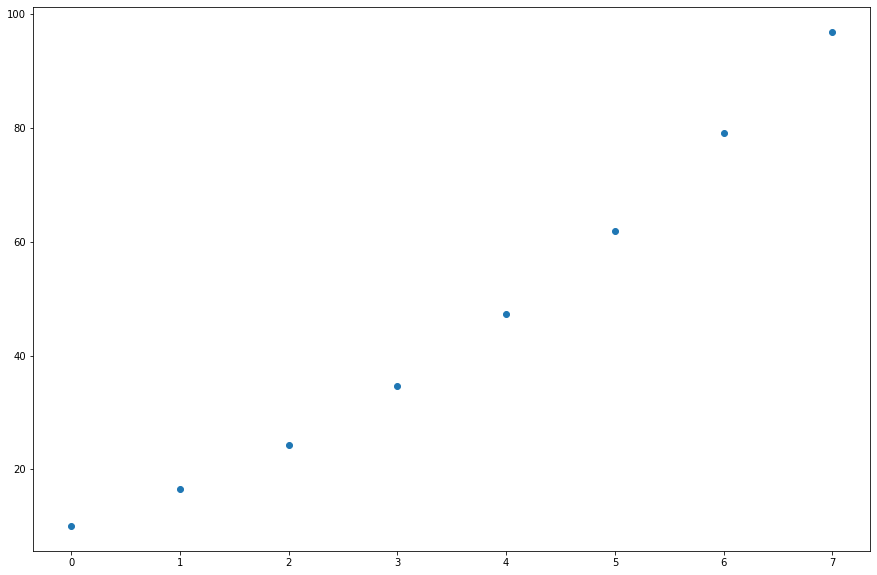

In [7]:
x = np.array(list(range(8)))
y = np.array([10, 16.5, 24.18, 34.56, 47.38, 61.98, 79.23, 96.93])
plt.figure(figsize = (15, 10))
plt.scatter(x,y)

- Fit a curve to the dataset of the form yp = a0 +a1x+a2x2. Plot this curve on the same plot as the previous part. What are the values of a0,a1,a2?

a0 : 9.998333319752819, a1 : 5.144880957647057, a2 : 1.0479761900774784


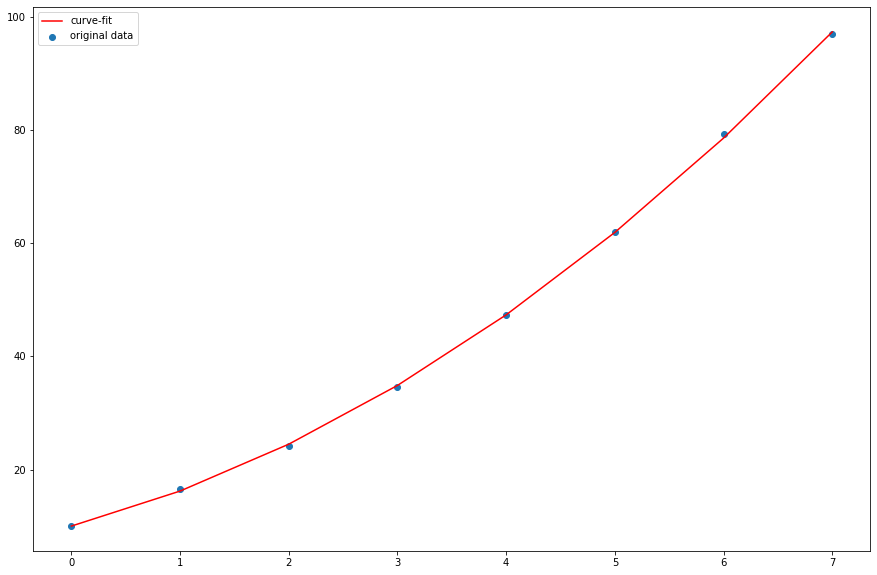

In [8]:
def quadratic(x, a0, a1, a2):
    return a0 + a1*x + a2*x**2

pars_quad, _ = curve_fit(quadratic, xdata = x, ydata = y, p0 = [10, 10, 10])
print("a0 : {}, a1 : {}, a2 : {}".format(pars_quad[0],pars_quad[1],pars_quad[2]))
plt.figure(figsize = (15,10))
plt.plot(x, quadratic(x,pars_quad[0],pars_quad[1],pars_quad[2]), c = 'r', label = 'curve-fit')
plt.scatter(x,y,label = 'original data')
plt.legend()

-  Estimate the value of y at x = 3.7

Estimate value of y at x = 3.7 : 43.38118690520761
Check from plot


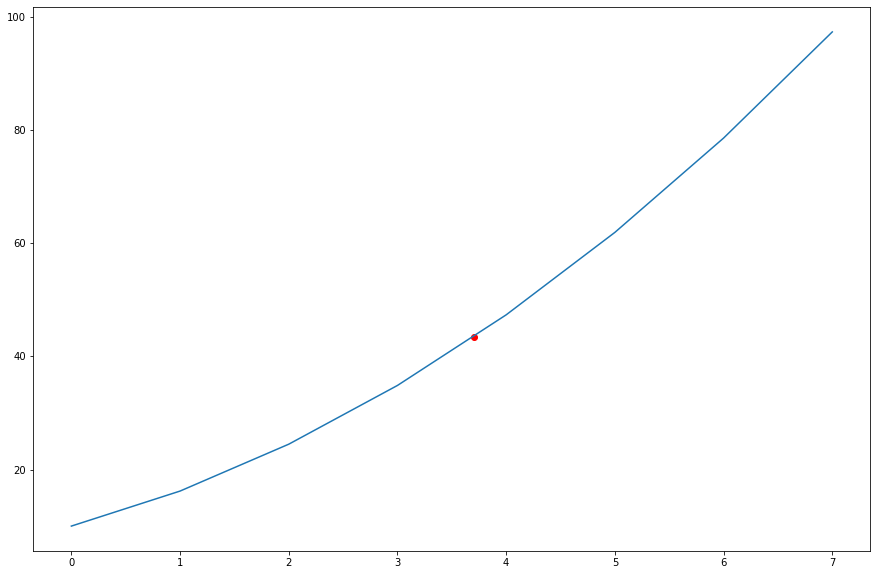

In [9]:
estimate = quadratic(3.7,pars_quad[0],pars_quad[1],pars_quad[2])
print("Estimate value of y at x = 3.7 :",estimate)

print('='*40)
print("Check from plot")
plt.figure(figsize = (15, 10))
plt.plot(x, quadratic(x,pars_quad[0],pars_quad[1],pars_quad[2]))
plt.scatter(3.7, estimate, c = 'r')
